In [ ]:
                                                                                  q # ============================================
# CREDIT CARD FRAUD DETECTION
# Decision Tree vs Neural Network with Graphs
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# ============================================
# Step 1: Load dataset
# ============================================

data = pd.read_csv("/content/creditcard.csv")
print("✅ Dataset loaded successfully!")


✅ Dataset loaded successfully!


In [ ]:
# ============================================
# Step 2: Data preprocessing
# ============================================

# Drop rows with missing values in the target variable 'Class'
data.dropna(subset=['Class'], inplace=True)

X = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train[['Time', 'Amount']] = scaler.fit_transform(x_train[['Time', 'Amount']])
x_test[['Time', 'Amount']] = scaler.transform(x_test[['Time', 'Amount']])


🌳 Decision Tree Results:
Accuracy: 0.9992
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18593
         1.0       0.82      0.84      0.83        43

    accuracy                           1.00     18636
   macro avg       0.91      0.92      0.91     18636
weighted avg       1.00      1.00      1.00     18636



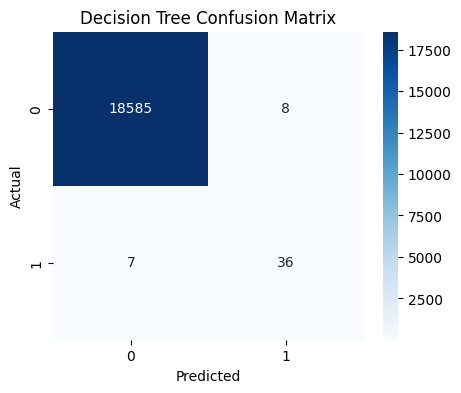

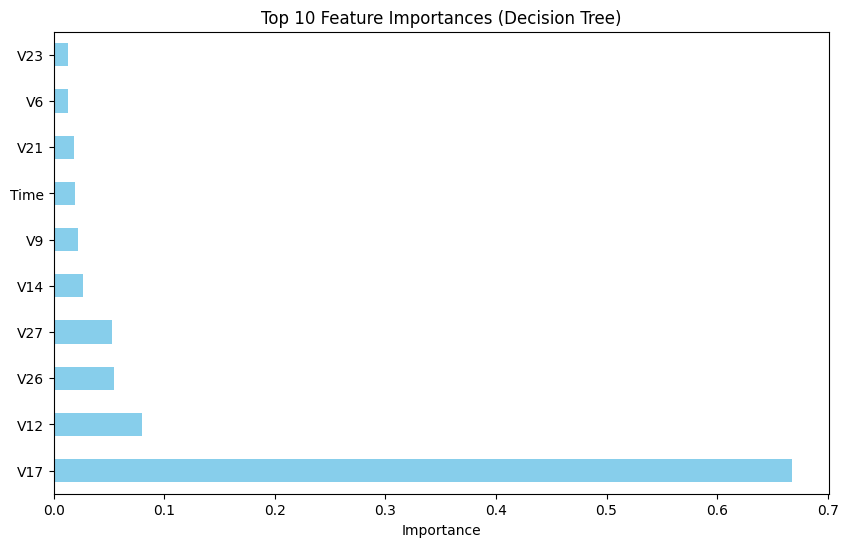

In [ ]:
# ============================================
# Step 3: Decision Tree Classifier
# ============================================

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

print("\n🌳 Decision Tree Results:")
print(f"Accuracy: {dt_acc:.4f}")
print(classification_report(y_test, y_pred_dt))

# --- Plot Decision Tree Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Plot Decision Tree Feature Importance ---
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5138 - loss: 0.6964 - val_accuracy: 0.9940 - val_loss: 0.4266
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9634 - loss: 0.3824 - val_accuracy: 0.9976 - val_loss: 0.2111
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9967 - loss: 0.1998 - val_accuracy: 0.9976 - val_loss: 0.0926
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9974 - loss: 0.1045 - val_accuracy: 0.9976 - val_loss: 0.0434
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9975 - loss: 0.0559 - val_accuracy: 0.9975 - val_loss: 0.0232
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9981 - loss: 0.0338 - val_accuracy: 0.9976 - val_loss: 0.0149
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0250 - val_accuracy: 0.9979 - val_loss: 0.0113
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9982 - loss: 0.0189 - val_accuracy: 0.9981 - val_loss

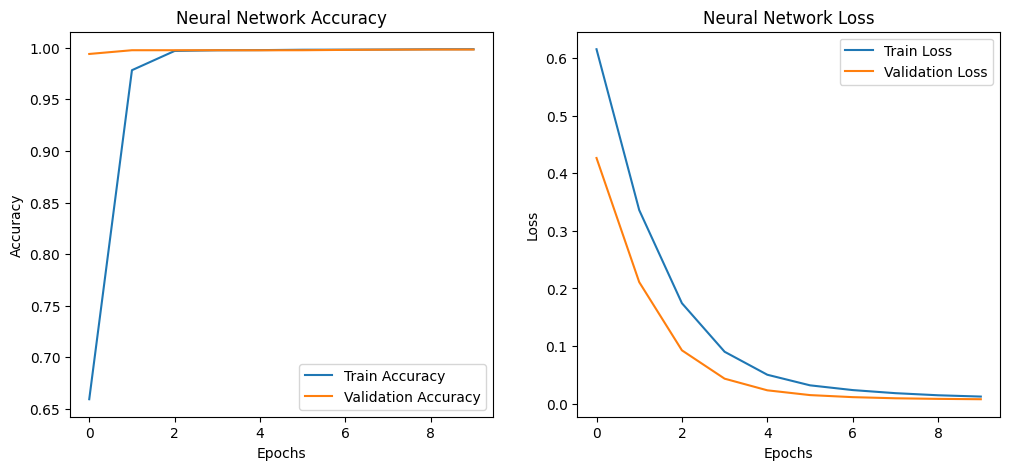

583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


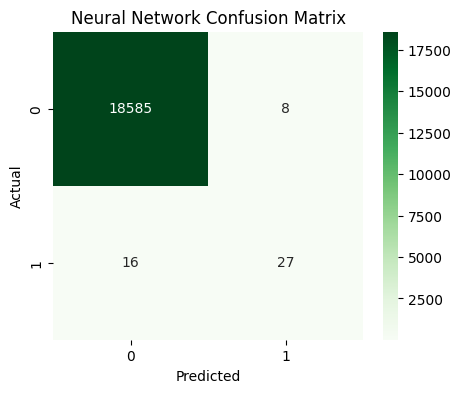

In [ ]:
# ============================================
# Step 4: Neural Network Model
# ============================================

nn_model = Sequential([
    Dense(32, input_dim=x_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history = nn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=2048,
    validation_split=0.2,
    verbose=1
)

loss, nn_acc = nn_model.evaluate(x_test, y_test, verbose=0)
print("\n🤖 Neural Network Results:")
print(f"Accuracy: {nn_acc:.4f}")

# --- Plot Training Accuracy & Loss ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# --- Plot Neural Network Confusion Matrix ---
y_pred_nn = (nn_model.predict(x_test) > 0.5).astype(int)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# ============================================
# Step 5: Model Comparison
# ============================================

print("\n===============================")
print("📊 Model Comparison")
print("===============================")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")

if nn_acc > dt_acc:
    print("\n✅ Neural Network selected as the best model.")
    best_model = nn_model
else:
    print("\n✅ Decision Tree selected as the best model.")
    best_model = dt_model


📊 Model Comparison
Decision Tree Accuracy: 0.9992
Neural Network Accuracy: 0.9987

✅ Decision Tree selected as the best model.


In [ ]:
# ------------------------------
# STEP 6: Compare Models
# ------------------------------
if tree_acc > log_acc:
    best_model = tree_model
    print("\n✅ Decision Tree selected as the best model.")
else:
    best_model = log_model
    print("\n✅ Logistic Regression selected as the best model.")



✅ Logistic Regression selected as the best model.


In [ ]:
# ============================================
# Step 6: Retrain Final Model
# ============================================

if isinstance(best_model, Sequential):
    print("\n🚀 Retraining Neural Network on full dataset...")
    best_model.fit(X, y, epochs=10, batch_size=2048, verbose=1)
else:
    print("\n🚀 Retraining Decision Tree on full dataset...")
    best_model.fit(X, y)

print("\n✅ Final model trained and ready for predictions!")


🚀 Retraining Decision Tree on full dataset...

✅ Final model trained and ready for predictions!


In [ ]:
# ============================================
# Step 7: Predictions
# ============================================

# --- Option 1: Predict on test set ---
print("\n🔍 Making predictions on test data...")
if isinstance(best_model, Sequential):
    y_pred = (best_model.predict(x_test) > 0.5).astype(int)
else:
    y_pred = best_model.predict(x_test)

# Show a few sample predictions
results = pd.DataFrame({
    'Actual': y_test.values[:20],
    'Predicted': y_pred[:20].flatten()
})
print("\nSample Predictions on Test Data:")
print(results)

# --- Option 2: Predict on a new custom transaction ---
print("\n💳 Predicting a single new transaction...")

# Example: Randomly pick one transaction from test set (you can replace it with custom input)
sample_data = x_test.iloc[0].values.reshape(1, -1)

if isinstance(best_model, Sequential):
    prediction = (best_model.predict(sample_data) > 0.5).astype(int)
else:
    prediction = best_model.predict(sample_data)

if prediction == 1:
    print("⚠️ FRAUD DETECTED in this transaction!")
else:
    print("✅ This transaction seems legitimate.")


🔍 Making predictions on test data...

Sample Predictions on Test Data:
    Actual  Predicted
0      0.0        0.0
1      0.0        0.0
2      0.0        0.0
3      0.0        0.0
4      0.0        0.0
5      0.0        0.0
6      0.0        0.0
7      0.0        0.0
8      0.0        0.0
9      0.0        0.0
10     0.0        0.0
11     0.0        0.0
12     0.0        0.0
13     0.0        0.0
14     0.0        0.0
15     0.0        0.0
16     0.0        0.0
17     0.0        0.0
18     0.0        0.0
19     0.0        0.0

💳 Predicting a single new transaction...
✅ This transaction seems legitimate.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
